# PR104
### *Comparison of Machine Learning Techniques for Software Quality Prediction*
 **a paper by Goyal, S. (2020) published in *Int. J. Knowl. Syst. Sci., 11(2)***
 ***
1. [Abstract](#abstract)
1. [Introduction](#intro)
1. [Experimental Setup](#setup)
    1. [Data Description](#ds)
    2. [Effectiveness of Metrics](#metrics)
    3. [Methods](#methods)

## Abstract <a class='anchor' id='abstract'></a>
The early detection of faulty (buggy) modules in software development and maintainance improves the effectiveness of quality enhancement activities and ultimately improves the overall quality of software products. Machine learning (*ML*) is widely being incorporated to master this task: a ML prediction model uses software metrics and faulty data from previous projects to detect failure-prone modules in future projects, so that the testing efforts can be targeted to those specific ‘risky' modules in the early phases of development cycle. In case faulty modules are not detected in early development phases, then the cost of getting the defect fixed increases multifold.
This article has a comparison of 30 software quality prediction models built on five ML techniques: artificial neural network (*ANN*); support vector machine (*SVMs*); Decision Tree (*DTs*); k-Nearest Neighbor (*KNN*); and Naïve Bayes Classifiers (*NBC*), using five datasets from the NASA *PROMISE* repository plus a combined one. These models exploit the predictive power of static code metrics, the McCabe complexity metrics, for quality prediction. All thirty predictors are compared using a receiver operator curve (*ROC*), area under the curve (*AUC*), and accuracy as performance evaluation criteria. **The results show that the *ANN* technique for software quality prediction is promising for accurate quality prediction irrespective of the dataset used.**

<br>

## Introduction <a class='anchor' id='intro'></a>

In software, the narrowest sense of product quality is commonly recognized as lack of "bugs" in the product. It is also the most basic meaning of conformance to requirements, because if the software contains too many functional defects, the basic requirement of providing the desired function is not met. This definition is usually expressed in two ways: **defect rate** (e.g., *number of defects per million lines of source code, per function point, or other unit*) and **reliability** (e.g., *number of failures per n hours of operation, mean time to failure, or the probability of failure free operation in a specified time*). <br>
The two groups of metrics are correlated but are different enough to merit close attention. First, one measures the number or the time between failures, the other measures the defects relative to the software size (lines of code, function points, etc.). Second, although it is difficult to separate defects and failures in actual measurements and data tracking, failures and defects (or faults) have different meanings. **For practical purposes, we will not distinguish between the two terms**, but indeed, in many development organizations the two terms are used synonymously. <br>
Regardless of their differences and similarities, *MTTF* and *defect density* are the two key metrics for **intrinsic product quality**. Accordingly, there exist two main types of software reliability growth models — the time between failures models and the defect count (defect rate) models.

**Customer satisfaction** is a complementary perspective on product quality, and is usually measured by percent satisfied or nonsatisfied (*neutral and dissatisfied*) from customer satisfaction surveys.
The role of the customer, as it relates to quality, can never be overstated. From a customer's standpoint, quality is the customer's perceived value of the purchased product, based on a variety of variables such as price, performance, reliability, and satisfaction. So eventually, **the de facto definition of software quality consists of two levels: intrinsic product quality and customer satisfaction.** 

#### Figure 1 - Scopes of Three Quality Metrics
<img src="Customer2.png" width=420 height=400 align='right'>

So many quality attributes and metrics with numerous Quality Assurance techniques are developed, but still the question: how to ensure that the resulting product will possess good quality? The early detection of failure-prone modules directly correlates with the quality of end-product. The early detection of faulty (buggy) modules improves the effectiveness of quality enhancement activities and ultimately improves the overall quality. <br>
In this paper, the software fault prediction is used as an indicator for software quality for two reasons:
- **Quality is inversely proportional to the failures, which in turn caused by faults** *(development anomalies)* 
<br>
<br>
- **The early fault detection provides decisive power to the entire development team to strategically allocate the testing resources.**

The present work is focused on the following research goals:

 **R1:** To transform the software quality prediction problem as a learning problem (***classification problem***).
 <br>
 **R2:** To create ML prediction models using *static code metrics* as predictors.
  <br>
 **R3:** To evaluate the accuracy of prediction models empirically.
  <br>
 **R4:** To find which ML technique outperforms other ML techniques.
  <br>

The major contribution of this work, is **to develop and validate a cross-platform generalized model**, to accurately predict the faulty modules in the software during development, so that the defects cannot propagate to the final phases and ultimately, the quality of software can be improved.

***

<br>

## Experiemental Set-up <a class='anchor' id='setup'></a>
### Data Description <a class='anchor' id='ds'></a>

The work utilizes the Data collected from NASA projects using McCabe metrics which are made available in the PROMISE repository. This research is done with six fault prediction benchmark datasets named **CM1, KC1, KC2, PC1, JM1** and **ALL_DATA** (*a combination of previous*). Data has been collected using McCabe and Halstead features extractors from the source code of multiple projects. Each instance in the dataset has 22 attributes, out of which 21 attributes can be used as features and 1 attribute serves as class-label for classification purpose. The class distribution of ‘Buggy’ and ‘Clean’ classes among the dataset is depicted in Table 1 and graphically shown in Figure 2.
<br>
The *PROMISE* repository is widely used by researchers for quality prediction benchmarking.

Each dataset has 22 attributes which include:
- **5** different lines of code measure
- **3** McCabe metrics
- **4** base Halstead measures
- **8** derived Halstead measures
- A branch-count and a Class_Label: {*False;True*} .

In [235]:
%%capture --no-stderr 
%run setup.ipynb
%run functions.ipynb
#plt.ioff()

,Instances,Buggy,Clean,Imbalance Ratio,Features,Source
Name,,,,,,
CM1,498,49,449,0.109131,22,CM1 is a NASA spacecraft instrument written in C
JM1,10885,2106,8779,0.239891,22,JM1 is written in C and is a real-time predictive ground system. It uses simulations to generate predictions
KC1,2109,326,1783,0.182838,22,KC1 is a C++ system implementing storage management for receiving and processing ground data
KC2,522,107,415,0.257831,22,C++ functions used in a scientific data project which is separate from another part known as KC1. These share some third-party software libraries with no other software overlap
PC1,1109,77,1032,0.074612,22,Data from C functions. Flight software for earth orbiting satellite
ALL_DATA,15123,2665,12458,0.213919,22,Combined Dataset


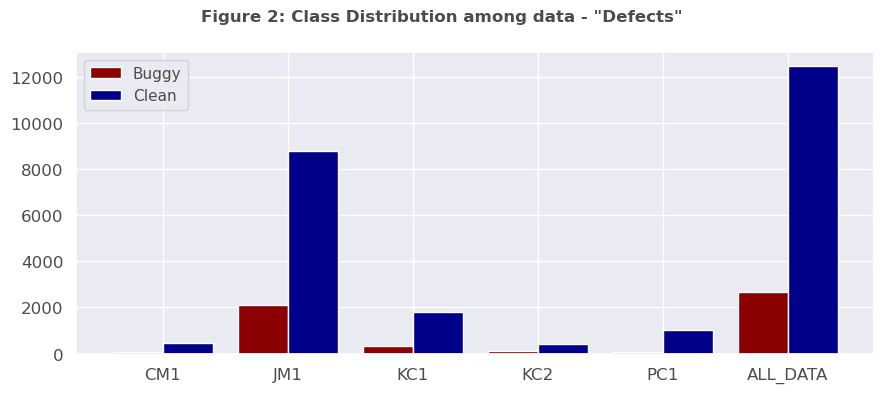

In [236]:
clear_output()
output = data_summary('Datasets_Summ', 'Name')

# display() is used to display any kind of object in the Jupyter notebook
# Could have used pd.options.display.max_colwidth
display(output[0])
print()
plt.show()

<br>

Datasets were downloaded from the PROMISE repositiory in ARFF format.
The ARFF (*Attribute-Relation File Format*) is a file format used by the WEKA machine learning software to store data sets. It is a text file format that has a structure that is similar to a CSV (*Comma-Separated Values*) file, but with additional information that specifies the name and data type of each attribute in the data set. This additional information makes it easier for machine learning algorithms to interpret the data and use it for training and evaluation.
I wrote a function,`arff_tocsv('name')`, to load data from ARFF files and save the resulting dataframes as CSV files. The sets_str list specifies the names of the ARFF files to be loaded.

A combined dataframe **ALL_DATA** is also needed for the analysis.

In [230]:
%%capture --no-stderr 
# Load data from ARFF files
# Save the resulting dataframes as CSV files. 

# Define the list of ARFF file names to be loaded
sets_str = ['cm1','kc1', 'kc2', 'pc1','jm1']

# Iterate over the file names
for elem in sets_str:
    # Create a string that defines a variable named after the element
    # and assigns the output of the function to it
    exec_string = f"{elem} = arff_tocsv('{elem}')"

    # Execute the string as Python code to create and assign the variable
    exec(exec_string)

# Concatenate all of the dataframes into a single dataframe
sets = [cm1, jm1, kc1, kc2, pc1]
all_data = pd.concat(sets, join="inner", ignore_index=True)

# Save the concatenated dataframe as a CSV file
all_data.to_csv(os.path.join(DATA_PATH, "all_data.csv"), mode="w")

Here's a summary and a preview of one of the datasets (**JM1**). As I already mentioned this is the variable list shared across all of them.

In [231]:
jm1.info()
jm1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc               10885 non-null  int32  
 1   v(g)              10885 non-null  int32  
 2   ev(g)             10885 non-null  int32  
 3   iv(g)             10885 non-null  int32  
 4   n                 10885 non-null  int32  
 5   v                 10885 non-null  float64
 6   l                 10885 non-null  float64
 7   d                 10885 non-null  float64
 8   i                 10885 non-null  float64
 9   e                 10885 non-null  float64
 10  b                 10885 non-null  float64
 11  t                 10885 non-null  float64
 12  lOCode            10885 non-null  int32  
 13  lOComment         10885 non-null  int32  
 14  lOBlank           10885 non-null  int32  
 15  lOCodeAndComment  10885 non-null  int32  
 16  uniq_Op           10885 non-null  int32 

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1,1,1,1,1,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1,1,1,1,1,0
1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,1
2,72,7,1,6,198,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,1
3,190,3,1,3,600,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,1
4,37,4,1,4,126,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,1


<br>

In [232]:
# Reproducing Table 1 just for checking

# Define the list of dataframes and the corresponding labels
sets = [cm1, jm1, kc1, kc2, pc1, all_data]
sets_str = ['cm1','jm1','kc1', 'kc2', 'pc1','all_data']

# Create an empty dataframe with the appropriate columns and data types
table1 = pd.DataFrame(columns=["Instances", "Buggy", "Clean"], dtype=int)

# Iterate over the dataframes and labels
for i, elem in enumerate(sets):
    # Compute the number of rows and number of buggy instances
    num_rows = len(elem.index)
    num_buggy = elem['defects'].sum()

    # Create a new dataframe with a single row for the current dataframe
    row = pd.DataFrame({"Instances":num_rows,
                        "Buggy":num_buggy,
                        "Clean":(num_rows - num_buggy),
                        "Imbalance Ratio":round((num_buggy)/(num_rows - num_buggy),3)}, 
                        index=[sets_str[i]])

    # Append the row to the table1 dataframe
    table1 = pd.concat([table1, row])

table1

,Instances,Buggy,Clean,Imbalance Ratio
cm1,498,49,449,0.109
jm1,10885,2106,8779,0.240
kc1,2109,326,1783,0.183
kc2,522,107,415,0.258
pc1,1109,77,1032,0.075
all_data,15123,2665,12458,0.214


***

### Effectiveness of Metrics <a class='anchor' id='metrics'></a>

In the paper, attributes #1, #2, #3 and #4 are selected as features to build the quality predictors.
The selected features are the McCabe’s Complexity metrics *(Thomas, 1976)*. These are static code metrics and in direct association with the quality of the software. The correlation among the selected features for the classes is shown in **Figure 4**.
The reason of using static code metrics as predictors is two-fold:
- **First**, these attributes are successfully used and widely accepted to predict the software defects and quality;
- **Second**, these metrics can be computed very easily at low costs.

Here's a brief description of these four features:

- **Lines of Code `LOC`**: The LOC count is usually for executable statements. It is actually a count of instruction statements according to McCabe's line counting conventions.
- **Cyclomatic Complexity `v(G)`**: Measures the number of "linearly independent paths". A set of paths is said to be linearly independent if no path in the set is a linear combination of any other paths in the set through a program's "flowgraph". $v(G)$ is calculated by $v(G) = e - n + 2$ where $G$ is a program's flowgraph, $e$ is the number of arcs in the flowgraph, and $n$ is the number of nodes in the flowgraph. The standard McCabe rules ( $v(G)>10$ ), are used to identify fault-prone module.
- **Essential Complexity `ev(G)`**: It is a measure of the inherent complexity of a software system. It is the extent to which a flowgraph can be "reduced" by decomposing all the subflowgraphs of $G$ that are "D-structured primes". $ev(G)$ is calculated using $ev(G)= v(G) - m$ where $m$ is the number of subflowgraphs of "G" that are D-structured primes.
- **Design Complexity `iv(G)`**: It is the cyclomatic complexity of a module's reduced flowgraph.  The flowgraph, $G$, of a module is reduced to eliminate any complexity which does not influence the interrelationship between design modules. According to McCabe, this complexity measurement reflects the modules calling patterns to its immediate subordinate modules.

Design complexity is similar to inherent complexity, in that it is a measure of the complexity that is inherent in the design and architecture of the software. However, design complexity specifically focuses on the design of the system, while inherent complexity is a broader measure of the overall complexity of the software.

This code uses the `varselect_tocsv()` function defined in the *functions.ipynb* module to select a subset of columns from each dataframe in the `sets_str` list, and save the resulting dataframes as CSV files. The `varnames` and `outnames` lists specify the columns to be selected and the names to be used for the CSV files, respectively.


In [233]:
%%capture --no-stderr 
# For each Dataset, selects McCabe metrics and response and store as a .csv

# Define the list of variable names to be selected
varnames = ['loc', 'v(g)', 'ev(g)', 'iv(g)','defects']

# Define the list of output names for the CSV files
outnames = ['cm1_mc','jm1_mc','kc1_mc', 'kc2_mc', 'pc1_mc','all_data_mc']

# Iterate over the dataframes and output names
for df, outname in zip(sets_str, outnames):
    # Create a string that defines a variable named after each outname
    # and assigns the output of the function to it
    exec_string = f"{outname} = varselect_tocsv({df}, varnames, '{outname}')"
    
    # Execute the string as Python code to create and assign the variable
    exec(exec_string)

In [14]:
jm1_mc.info()
round(jm1_mc.describe(),2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   loc      10885 non-null  int32
 1   v(g)     10885 non-null  int32
 2   ev(g)    10885 non-null  int32
 3   iv(g)    10885 non-null  int32
 4   defects  10885 non-null  int32
dtypes: int32(5)
memory usage: 212.7 KB


,loc,v(g),ev(g),iv(g),defects
count,10885.00,10885.00,10885.00,10885.00,10885.00
mean,42.02,6.35,3.40,4.00,0.19
std,76.59,13.02,6.77,9.12,0.40
min,1.00,1.00,1.00,1.00,0.00
25%,11.00,2.00,1.00,1.00,0.00
50%,23.00,3.00,1.00,2.00,0.00
75%,46.00,7.00,3.00,4.00,0.00
max,3442.00,470.00,165.00,402.00,1.00


<br>

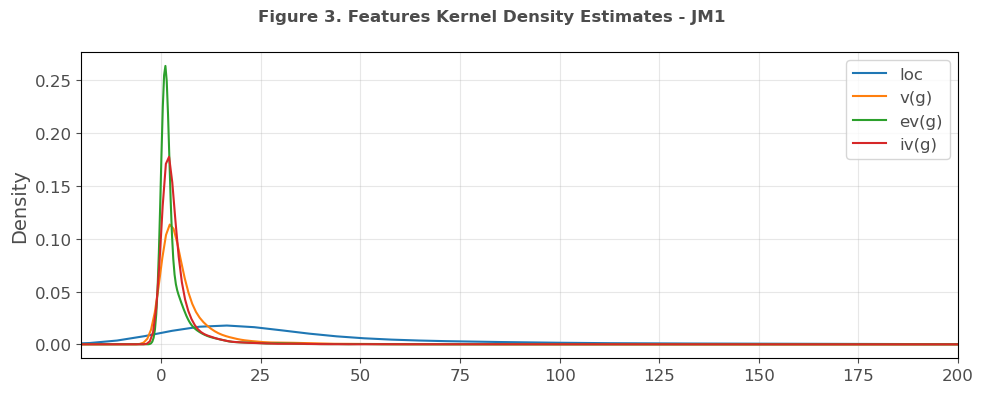

In [12]:
# Clear any previous output
clear_output()

# Plot the kernel density estimate for jm1_mc
jm1_mc.drop('defects', axis=1).plot.kde(figsize=(10,4))

# Set the x-axis limits
plt.xlim((-20, 200))

# Add gridlines with low alpha value to make them slightly transparent
plt.grid(alpha=0.3)

# Add a title to the plot
plt.suptitle('Figure 3. Features Kernel Density Estimates - JM1',
               fontsize=12, fontweight='bold')

# Save the figure to a file
save_fig('KDE_plot')

# Display the plot
plt.show()

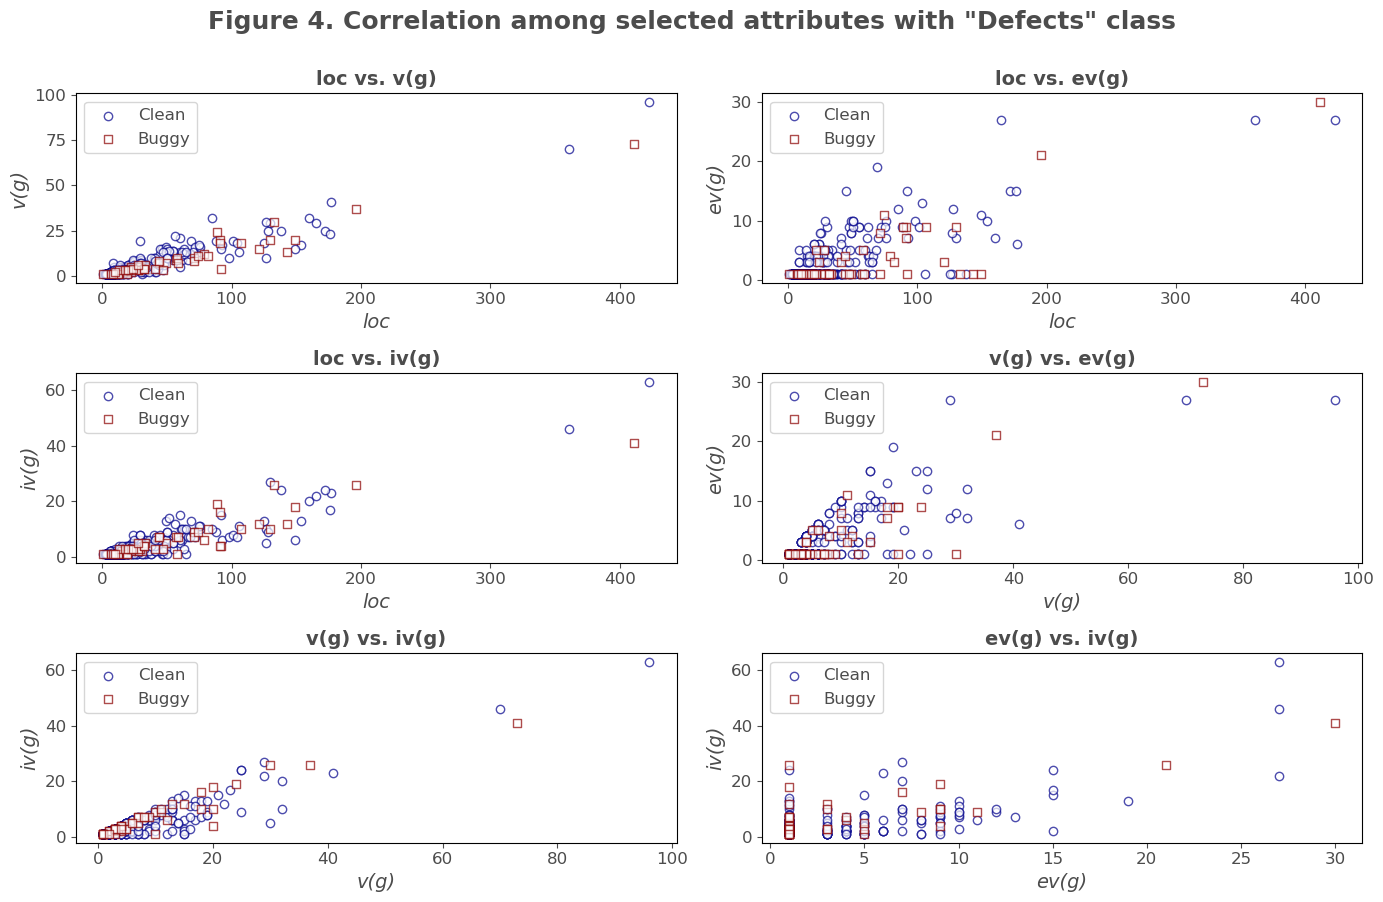

In [9]:
# Clear any previous output
clear_output()

# create a figure and a set of subplots with 3 rows and 2 columns
fig, ax = plt.subplots(3,2, figsize=(14,9))

# create a scatter plot for each features combination and axes
scatter_custom('loc','v(g)',cm1_mc, ax=ax[0,0])
scatter_custom('loc','ev(g)',cm1_mc, ax=ax[0,1])
scatter_custom('loc','iv(g)',cm1_mc, ax=ax[1,0])
scatter_custom('v(g)','ev(g)',cm1_mc, ax=ax[1,1])
scatter_custom('v(g)','iv(g)',cm1_mc, ax=ax[2,0])
scatter_custom('ev(g)','iv(g)',cm1_mc, ax=ax[2,1])

# adjust the layout of the subplots
plt.tight_layout()

# set a title for the figure
fig.suptitle('Figure 4. Correlation among selected attributes with "Defects" class',
               fontsize=18, fontweight='bold', y=1.00)

# save the figure to a file
save_fig('corr_scatterplot')

# show the figure
plt.show()

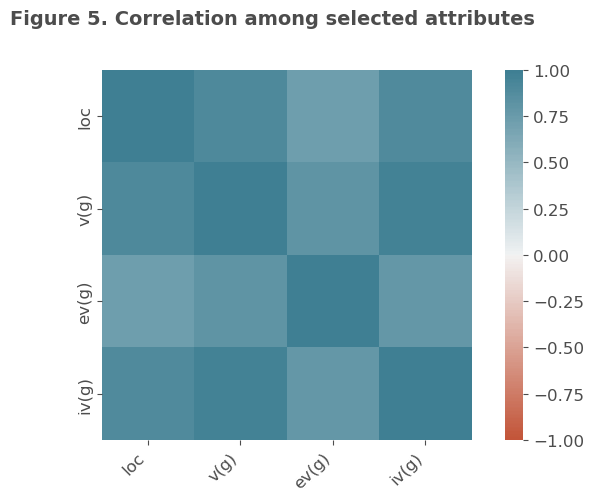

In [22]:
fig, ax = plt.subplots(figsize=(7,5))
# # Calculate correlation matrix of the features
corr = kc1_mc.iloc[:, :-1].corr()

# Plot the correlation matrix as heatmap using Seaborn library
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# Rotate the x-axis labels for better visualization
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# Set a title for the figure
fig.suptitle('Figure 5. Correlation among selected attributes',
               fontsize=14, fontweight='bold', y=1.00)

# Save the figure to a file
save_fig('corr_matrix')

*** 

### Methods <a class='anchor' id='methods'></a>

The prediction models are built using Supervised Learning approaches which proved to be promising
in this research field (**Cfr.** *Summary of literature on software quality prediction* in the original paper). The techniques used to build our prediction models are artificial neural network, support vector machine, naïve-bayes
classifier, classification trees and k-nearest neighbor (*Mitchell, 1997*). Each of these 5 classifiers is trained and tested for all the 6 *reduced* datasets (CM1, KC1, KC2, PC1, JM1 and All_Data) resulting in 30 prediction models:

- **Artificial Neural Network**: ANNs are Multilayer Perceptrons used for classification and regression. The standard multilayer perceptron (MLP) is a cascade of single-layer perceptrons "stacked" together. Single-layer networks have just one layer of active units. Inputs connect directly to the outputs through a single layer of weights. The outputs do not interact, so a network with N outputs can be treated as N separate single-output networks. In a MLP there is a layer of input nodes (*4 here*),an output layer that produces the output variables (*here the probability of the positive class*), and one or more intermediate layers. The interior layers are sometimes called “hidden layers” because they are not directly observable. In this analysis, a **MLP with one hidden layer** will be used. 
- **Support Vector Machine**: The idea behind the SVM algorithm is to find the best boundary (or "hyperplane") that separates the different classes in the data. This boundary is chosen in such a way that it maximizes the margin, which is the distance between the boundary and the closest data points from each class. Once the boundary is determined, new data can be classified based on which side of the boundary it falls on. Such (linear or not) boundary is fully determined (or “supported”) by the instances located on the edge of the street. These instances are called the support vectors. The support vector machine (SVM) is an extension of the support vector classier that results from enlarging the feature space in a specific way, using kernels. In our prediction models, the **RBF** kernel is used;

- **Decision Tree**: non-parametric, supervised learning method used for classification and regression. They are based on the idea of recursive partitioning of the feature space into smaller and smaller subsets, eventually resulting in a tree-like model of decisions. In our prediction models, the **CART** algorithm is used;

- **Gaussian Naïve-Bayes**: an approximation of the Bayes classifier under the assumption of independence between every pair of features. Here, it is also based on the concept that within each class, the $jth$ predictor is drawn from a (univariate) normal distribution. The algorithm first calculates the probability of a data point belonging to each class, given the feature values of the data point, it then selects the class with the highest probability as the prediction for the data point; 

- **K-Nearest Neighbors**: a supervised ML algorithm that works by finding the *k* data points in the training set that are closest to the input data point $x_0$ and uses those data points to make a prediction. The class conditional probabilities are estimated as the fraction of points in in the neighbour set whose response corresponds to each certain $jth$ class. Finally, KNN classifies the test observation $x_0$ to the class with the largest of these probabilities. The nearest neighbour class of classifiers adapts the amount of smoothing to the local density of data. The degree of smoothing is controlled by the hyperparameter $k$. In the original paper, $k = 10$.

{'ConfusionMatrixDisplay': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1a981c388e0>,
 'confusionmatrix': array([[396,  19],
        [ 62,  45]], dtype=int64),
 'accuracy': 0.845,
 'recall': 42.45,
 'auc': 0.807,
 'model': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('robustscaler',
                                                   RobustScaler(),
                                                   ['loc', 'v(g)', 'ev(g)',
                                                    'iv(g)'])])),
                 ('gaussiannb', GaussianNB())])}

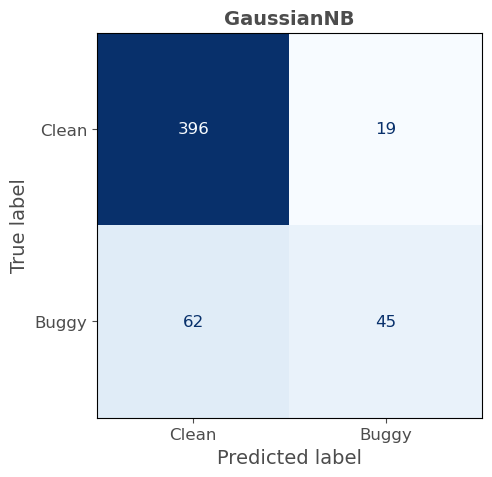

In [8]:
%run COPIA_functions.ipynb
nb = nbayes_cv(kc2_mc, shuffle=True, seed=42)
nb

Fitting 10 folds for each of 40 candidates, totalling 400 fits
{'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 0.00022219245475399153, 'mlpclassifier__hidden_layer_sizes': 3}


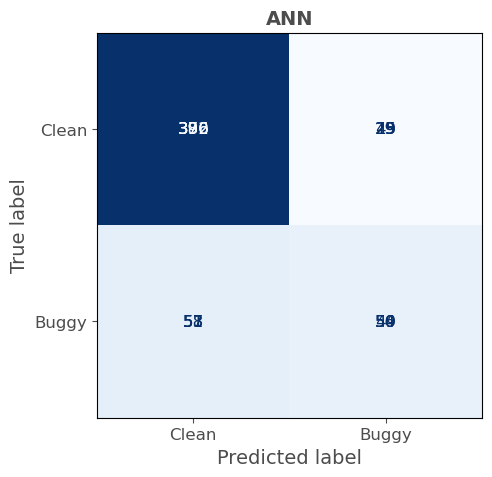

In [9]:
knn = knn_cv(kc2_mc, weights="distance")
tree = tree_cv(kc2_mc)
svm = svm_cv(kc2_mc, n_iter = 40, probability=True)
ann = ann_cv(kc2_mc, n_iter = 40)

# V2.2 using recall scoring and bounding range ks
# cm1 we got 86 accuracy (PERF) and 12% (actual) recall
# kc1 we got 49 accuracy and 45% (actual 64) recall
# kc2 we got 81 accuracy and 44% (actual 48) recall
# pc1 we got 86 accuracy and 9% (actual 41.5) recall
# jm1 we got 47.5 accuracy and 43% (actual 60) recall

Fitting 10 folds for each of 70 candidates, totalling 700 fits
{'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 0.00022219245475399153, 'mlpclassifier__hidden_layer_sizes': 3}


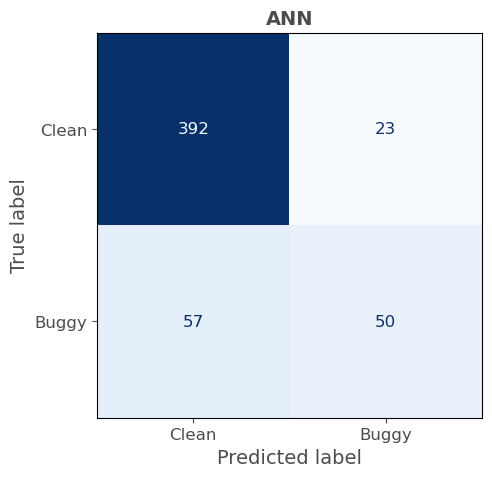

In [128]:
ann = ann_cv(kc2_mc, n_iter = 70)

In [129]:
print(ann['accuracy'])
print(ann['recall'])
print(ann['auc'])

0.847
47.18
0.841


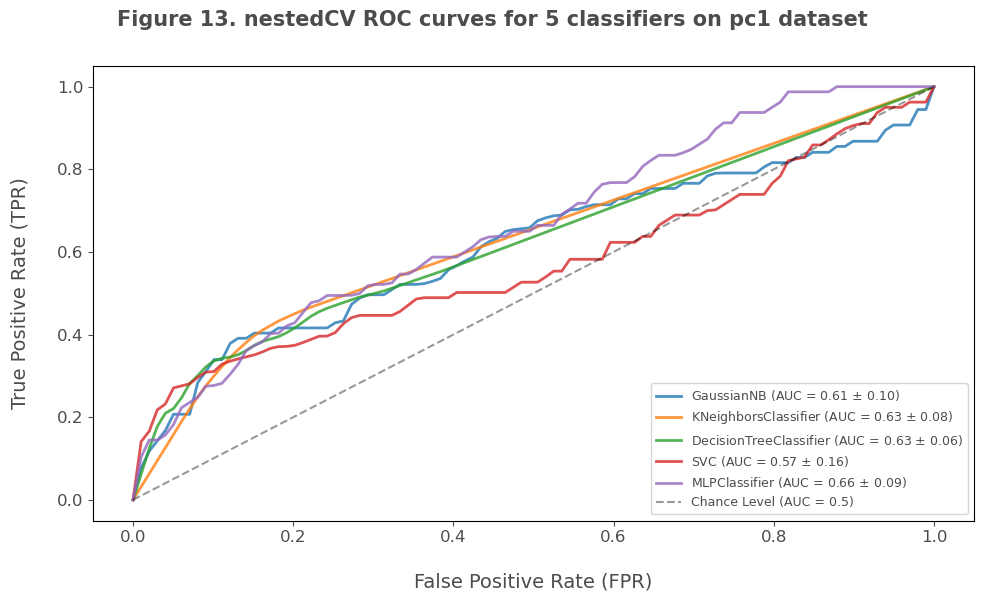

In [63]:
%run functions.ipynb
compare_roc(pc1_mc, cm1_res['models'])
plt.suptitle('Figure 13. nestedCV ROC curves for 5 classifiers on pc1 dataset',
               fontsize=15, fontweight='bold', y=1.00)
save_fig('prova')

Text(0.5, 1.0, 'Figure 13. Too optimitics ROC curves for 5 classifiers built using KC2 dataset')

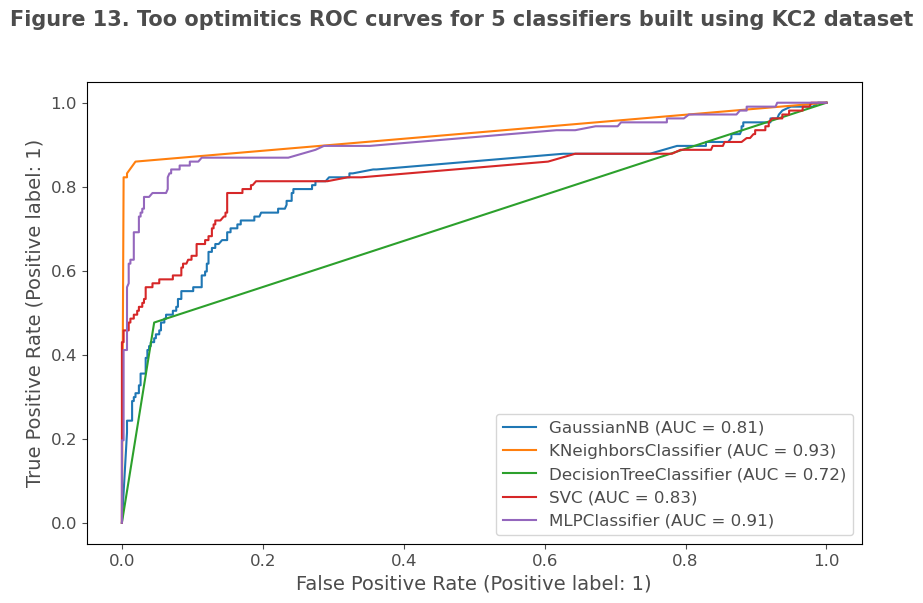

In [121]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(5):
    name = cm1_res['models'][i].steps[-1][1].__class__.__name__ 
    RocCurveDisplay.from_estimator(kc1_res['models'][i], ax=ax,  y = kc1_mc['defects'], X = kc1_mc.drop('defects', axis = 1), name = name )
plt.suptitle('Figure 13. Too optimitics ROC curves for 5 classifiers built using KC1 dataset',
               fontsize=15, fontweight='bold', y=1.00)

<br>

If your dictionary includes objects from the scikit-learn library, such as a Pipeline or a ConfusionMatrixDisplay, you can still use the pickle module to save and load the dictionary. The scikit-learn objects are picklable, which means that they can be serialized and deserialized by the pickle module.

Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.0007934293594590592, 'mlpclassifier__hidden_layer_sizes': 21}


Text(0.5, 1.1, 'Figure63. Confusion Matrices over pc1')

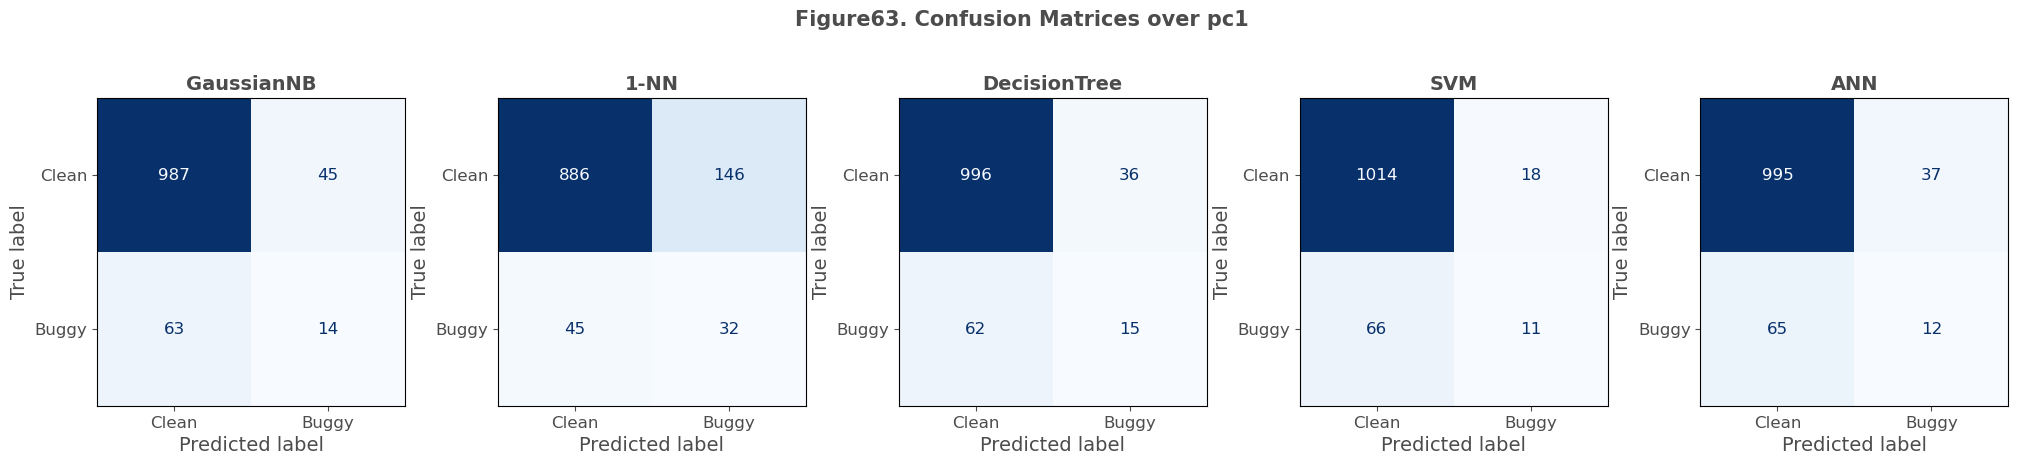

In [61]:
%run functions.ipynb
models_list = [{"model": nbayes_cv},
               {"model": knn_cv, "weights":"distance"},
               {'model': tree_cv},
               {"model": svm_cv, "n_iter":60, 'probability':True},
               {'model': ann_cv, 'n_iter':60, 'solver':'lbfgs'}]

cm1_res = compare_classifiers(pc1_mc, models_list, 'prova')
plt.suptitle('Figure63. Confusion Matrices over pc1',
               fontsize=15, fontweight='bold', y=1.1)

In [62]:
cm1_res['auc']

array([0.614, 0.63 , 0.627, 0.629, 0.643])

In [58]:
pd.DataFrame(rec, index=sets_str[:3], columns=['GaussianNB', 'kNN', 'Tree'])

,GaussianNB,kNN,Tree
cm1,24.5,14.50,14.00
jm1,18.0,26.30,24.08
kc1,26.7,23.89,24.79


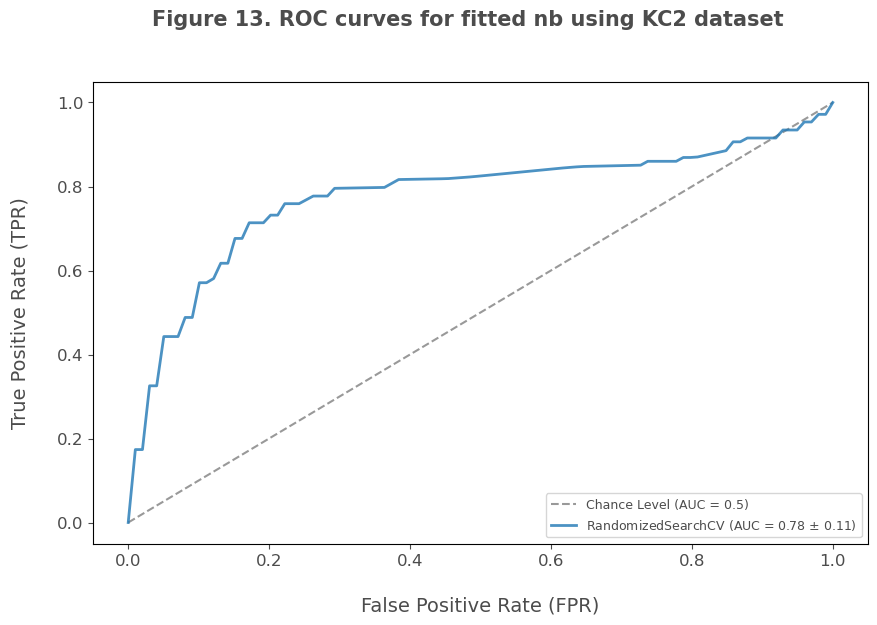

In [30]:
%run COPIA_functions.ipynb
fig, ax = plt.subplots(figsize=(10, 6))
roc_cv(svm['model'], kc2_mc, cv = None, ax = ax, chance = True)
plt.suptitle('Figure 13. ROC curves for fitted nb using KC2 dataset',
               fontsize=15, fontweight='bold', y=1.00)
# Plot the chance level (AUC = 0.5) on the same axis
# ax.plot([0, 1], [0, 1], "k--", label="Chance Level (AUC = 0.5)", alpha=0.4)
    
# Add a legend to the plot to show the AUC for each model
plt.legend(loc='lower right', markerscale=9, prop={'size': 9})